In [2]:
from cleantext import clean
import re
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Part 1

## Task 1

[nltk_data] Downloading package punkt to /Users/maxmeldal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxmeldal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


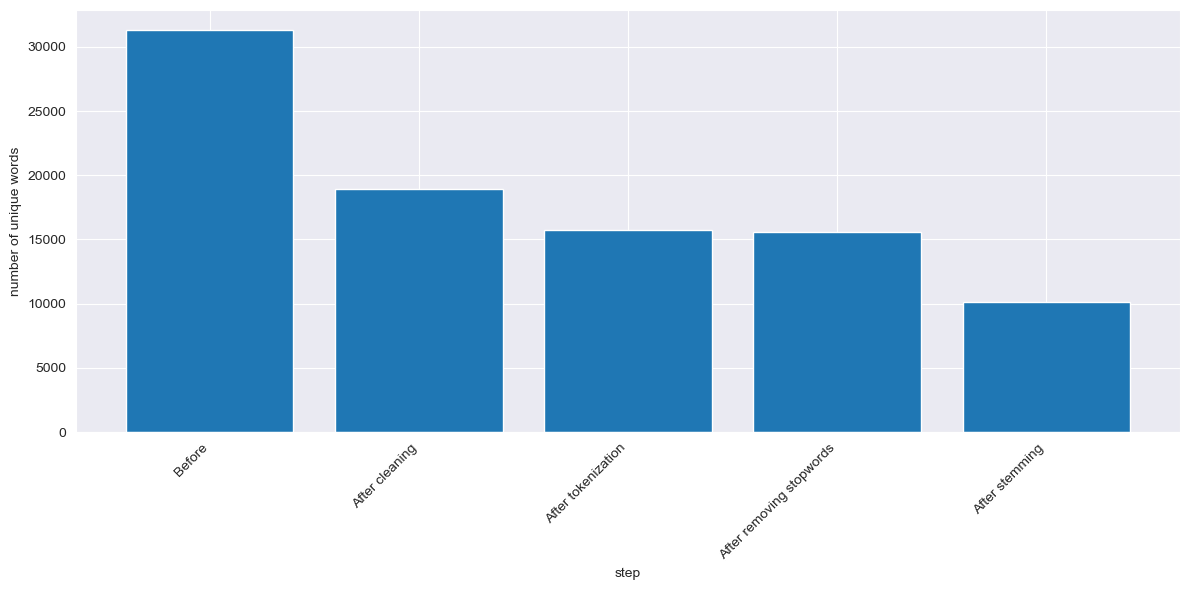

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

url = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'

news_sample = pd.read_csv(url)
unique_words_set_before = set()
unique_words_set_after_cleaning = set()
unique_words_set_after_tokenization = set()
unique_words_set_after_stop_word_removal = set()
unique_words_set_after_stemming = set()
stop_words = set(stopwords.words('english'))

for content in news_sample['content']:
    content = content.split(' ')
    unique_words_set_before.update(content)


def clean_with_cleantext(text):
    text = clean(text,
                 lower=True,
                 no_urls=True,
                 no_emails=True,
                 no_numbers=True,
                 no_digits=True,
                 replace_with_url="",
                 replace_with_email="",
                 replace_with_number="",
                 replace_with_digit="",
                 lang="en")
    text = re.sub(r'[-\/]', ' ', text)
    text = re.sub(r'[!\+\/@#$%^&?!=\<\>_*.,€:;\[\]\{\}\'\"\´\¨\(\)\\]', '', text)
    return text


news_sample['content'] = news_sample['content'].apply(clean_with_cleantext)

for content in news_sample['content']:
    after_clean = content.split(' ')
    unique_words_set_after_cleaning.update(after_clean)
    content = content.lower()
    content = nltk.word_tokenize(content)
    unique_words_set_after_tokenization.update(content)
    content = [token for token in content if token not in stop_words]
    unique_words_set_after_stop_word_removal.update(content)
    porter = nltk.PorterStemmer()
    content = [porter.stem(token) for token in content]
    unique_words_set_after_stemming.update(content)

len_before = len(unique_words_set_before)
len_after_clean = len(unique_words_set_after_cleaning)
len_after_token = len(unique_words_set_after_tokenization)
len_after_stopwords = len(unique_words_set_after_stop_word_removal)
len_after_stemming = len(unique_words_set_after_stemming)

plt.figure(figsize=(12, 6))
plt.bar(['Before', 'After cleaning', 'After tokenization', 'After removing stopwords', 'After stemming'],
        [len_before, len_after_clean, len_after_token, len_after_stopwords, len_after_stemming])
plt.xlabel('step')
plt.ylabel('number of unique words')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Prevent labels from overlapping

plt.show()

## Task 2

### Observation 1

/var/folders/08/xjbs0s0j72s556nv4_bvymhh0000gn/T/ipykernel_61791/3722792564.py:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


starting loop
finished loop


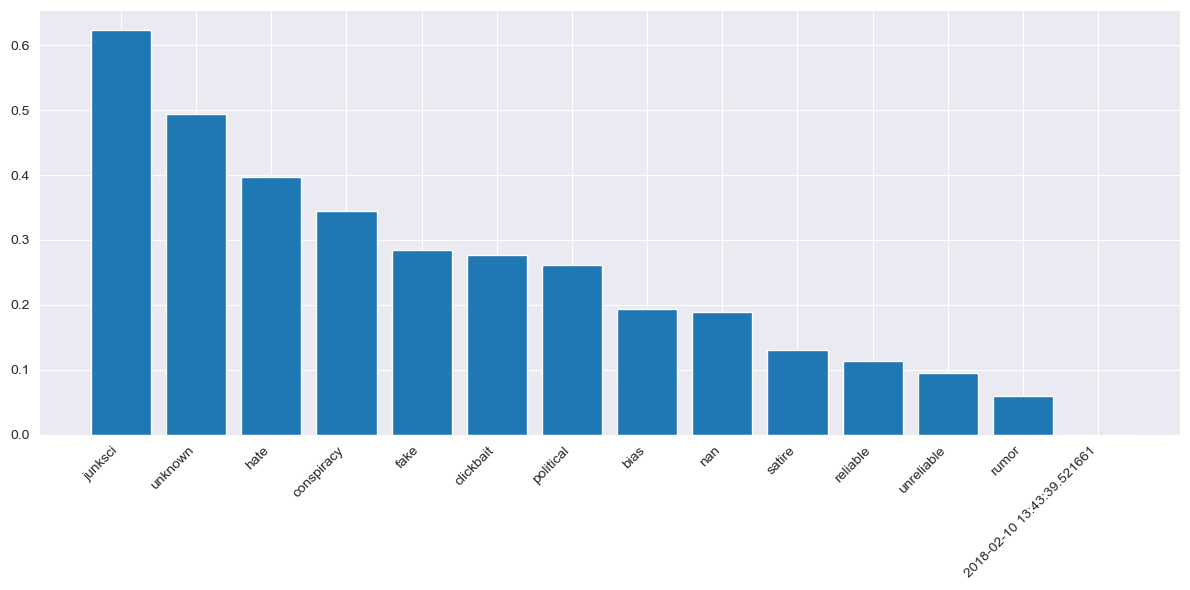

In [5]:
# Assuming url is correctly defined and points to a valid CSV file
#path = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'  # Placeholder URL
path = '995,000_rows.csv'  # Placeholder URL

# Read the CSV file into a DataFrame
df = pd.read_csv(path)

# Initialize an empty dictionary to hold the frequencies and article counts
truth_frequencies = {}
article_counts = {}

# Compile a regular expression pattern for improved performance
pattern = re.compile(r'\btr(?:ue|uth|uly|uthful|uthfulness)\b', re.IGNORECASE)

print('starting loop')
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Get the article type
    arttype = row['type']

    # Ensure the content is a string to avoid errors with missing or NaN values
    content = str(row['content'])

    # Use re.findall() to find all occurrences of the pattern
    matches = pattern.findall(content)

    # The number of occurrences is the length of the list returned by findall()
    true_count = len(matches)

    # If the article type is already in the dictionary, update counts
    if arttype in truth_frequencies:
        truth_frequencies[arttype] += true_count
        article_counts[arttype] += 1
    else:
        # If the article type is not in the dictionary, initialize it
        truth_frequencies[arttype] = true_count
        article_counts[arttype] = 1

print('finished loop')

# Calculate the weighted truth frequencies
weighted_truth_frequencies = {arttype: truth_frequencies[arttype] / article_counts[arttype] for arttype in
                              truth_frequencies}
sorted_truth_frequencies = sorted(weighted_truth_frequencies.items(), key=lambda item: item[1], reverse=True)

types = [str(k) for k, v in sorted_truth_frequencies]
frequencies = [v for k, v in sorted_truth_frequencies]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(types, frequencies)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Prevent labels from overlapping
plt.show()


### Observation 2

/var/folders/08/xjbs0s0j72s556nv4_bvymhh0000gn/T/ipykernel_61791/1710084879.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


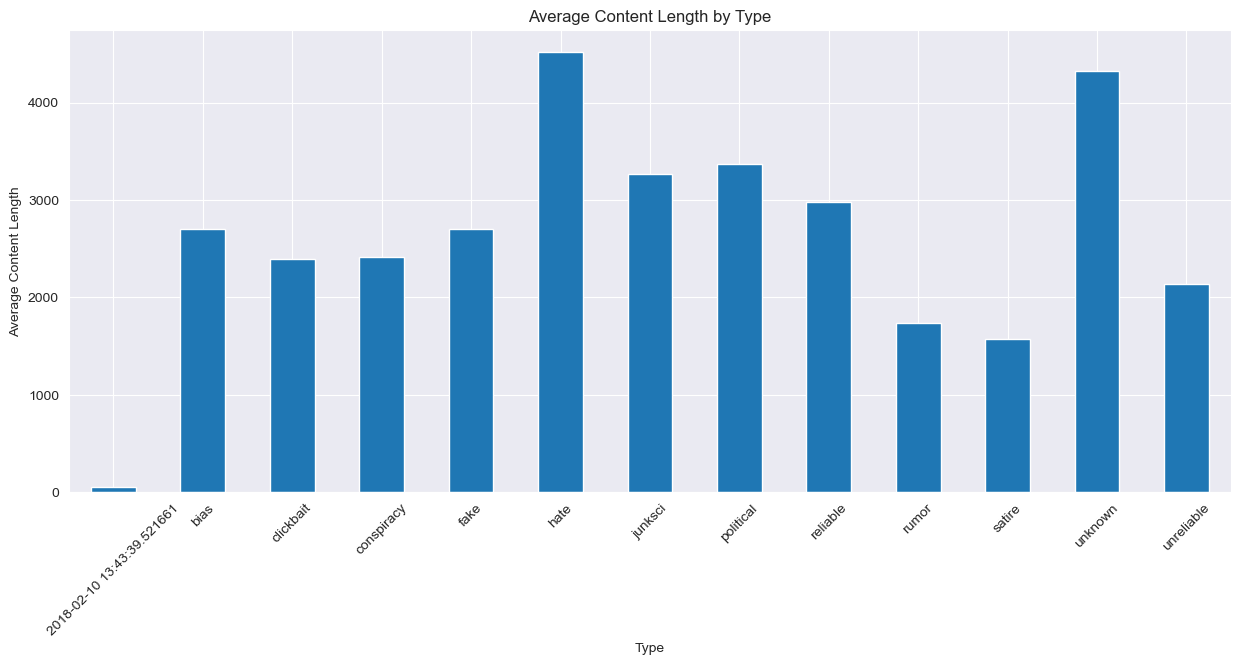

In [3]:
# Load your dataset
path = '995,000_rows.csv'
df = pd.read_csv(path)

# Calculate the length of each content
df['content_length'] = df['content'].apply(lambda x: len(str(x)))

# Group by 'type' and calculate the average content length for each type
avg_content_length_by_type = df.groupby('type')['content_length'].mean()

# Plotting
plt.figure(figsize=(15, 6))
avg_content_length_by_type.plot(kind='bar')
plt.title('Average Content Length by Type')
plt.xlabel('Type')
plt.ylabel('Average Content Length')
plt.xticks(rotation=45)
plt.show()


### Observation 3

In [1]:
#path = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'  # Placeholder URL
path = '995,000_rows.csv'  # Placeholder path

# Read the CSV file into a DataFrame
df = pd.read_csv(path)

# Initialize dictionaries to hold total word lengths and total word counts for each article type
total_word_lengths = {}
total_word_counts = {}

print('starting loop')
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Get the article type
    arttype = row['type']

    # Ensure the content is a string to avoid errors with missing or NaN values
    content = str(row['content'])

    # Split the content into words, filtering out empty strings
    words = [word for word in content.split() if word]

    # Calculate the total length of all words in the content
    total_length = sum(len(word) for word in words)
    word_count = len(words)

    # Update the total word lengths and counts for the article type
    if arttype in total_word_lengths:
        total_word_lengths[arttype] += total_length
        total_word_counts[arttype] += word_count
    else:
        total_word_lengths[arttype] = total_length
        total_word_counts[arttype] = word_count

print('finished loop')

# Calculate the average word length for each article type
average_word_lengths = {arttype: total_word_lengths[arttype] / total_word_counts[arttype]
                        for arttype in total_word_lengths}
sorted_average_word_lengths = sorted(average_word_lengths.items(), key=lambda item: item[1], reverse=True)

types = [str(k) for k, v in sorted_average_word_lengths]
averages = [v for k, v in sorted_average_word_lengths]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(types, averages)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Prevent labels from overlapping
plt.show()


NameError: name 'pd' is not defined

### Observation 4

/var/folders/08/xjbs0s0j72s556nv4_bvymhh0000gn/T/ipykernel_61791/2791639043.py:15: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


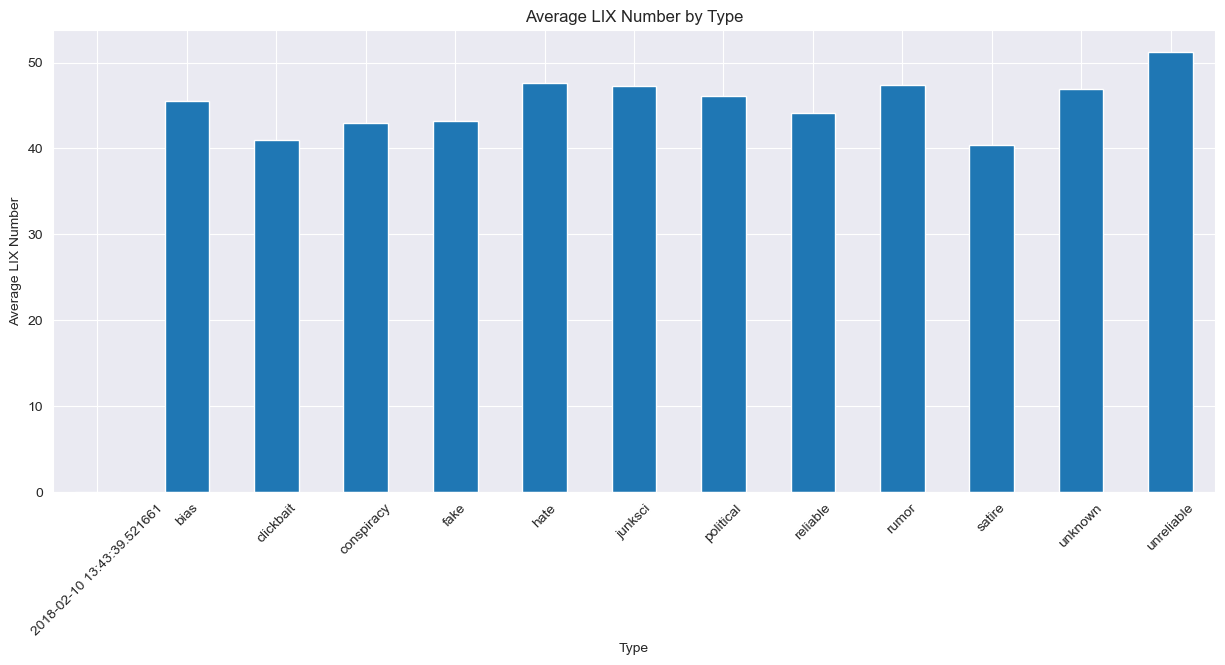

In [7]:
# Function to calculate the LIX number
def calculate_lix(text):
    words = text.split()
    num_words = len(words)
    num_sentences = text.count('.') + text.count('?') + text.count('!')
    num_long_words = sum(1 for word in words if len(word) > 6)
    if num_sentences == 0:  # Avoid division by zero
        return 0
    lix = (num_words / num_sentences) + (num_long_words / num_words) * 100
    return lix


# Load your dataset
path = '995,000_rows.csv'
df = pd.read_csv(path)

# Calculate the LIX number for each content
df['lix_number'] = df['content'].apply(lambda x: calculate_lix(str(x)))

# Group by 'type' and calculate the average LIX number for each type
avg_lix_number_by_type = df.groupby('type')['lix_number'].mean()

# Plotting
plt.figure(figsize=(15, 6))
avg_lix_number_by_type.plot(kind='bar')
plt.title('Average LIX Number by Type')
plt.xlabel('Type')
plt.ylabel('Average LIX Number')
plt.xticks(rotation=45)
plt.show()


## Task 3

In [ ]:
# Specify the URL of the CSV file
url = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'

# Use pandas to read the CSV directly from the URL
df = pd.read_csv(url)


def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Replace URLs
    text = re.sub(r'(https?://)[^, \n]*', '<URL>', text)
    text = re.sub(r'(www.)[^, \n]*', '<URL>', text)
    # Replace emails
    text = re.sub(r'\S+@(\S+\.)+\S+', '<EMAIL>', text)
    # Replace dates (simple patterns, for demonstration)
    text = re.sub(r'(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec) [0-9]{2,4}', '<DATE>', text)
    # Replace number
    text = re.sub(r'\d+(,\d+)*(\.\d+)?', '<NUM>', text)
    # Replace various consecutive whitespaces with just one
    text = re.sub(r' {2,}', ' ', text)
    text = re.sub(r'\n{2,}', '\n', text)
    text = re.sub(r'\t{2,}', '\t', text)
    return text


def clean_with_cleantext(text):
    if type(text) != str:
        text = str(text)
    text = text.lower()
    text = re.sub(r'(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec) [0-9]{2,4}', '<DATE>', text)
    return clean(text,
                 lower=False,
                 no_urls=True,
                 no_emails=True,
                 no_digits=True,
                 no_numbers=True,
                 replace_with_url="<URL>",
                 replace_with_email="<EMAIL>",
                 replace_with_number="<NUM>",
                 replace_with_digit="<NUM>",
                 normalize_whitespace=True
                 )


df['content'] = df['content'].apply(clean_with_cleantext)

df.to_csv("sample_cleaned.csv", index=False)

## Task 4

In [4]:
url = 'cleaned.csv'

# Use pandas to read the CSV directly from the URL
df = pd.read_csv(url)

real_types = ['political', 'fake', 'satire', 'reliable', 'conspiracy', 'unreliable', 'bias', 'rumor', 'clickbait',
              'hate', 'junksci']
df = df[df['type'].notna() & (df['type'].isin(real_types))]


def split_dataset(dataset, labels, test_size=0.1, random_state=42):
    """
    Split the dataset into training, validation, and test sets.
    """
    # Split into train+val and test
    X_train_val, X_test, y_train_val, y_test = train_test_split(dataset, labels, test_size=test_size, random_state=random_state)

    # Split train+val into train and val
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=test_size / (1 - test_size), random_state=random_state)

    return X_train, X_val, X_test, y_train, y_val, y_test

reliable_types = ['reliable', 'political']
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(df['content'], [int(t in reliable_types) for t in df['type'] ])

/var/folders/08/xjbs0s0j72s556nv4_bvymhh0000gn/T/ipykernel_5114/1377455329.py:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


# Part 2

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import wandb
import seaborn as sns
from joblib import dump, load

models = {
    "LogisticRegression": LogisticRegression(solver="liblinear", multi_class="ovr"),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "KNeighborsClassifier": KNeighborsClassifier(),
}

run = wandb.init(project="datascience_project", config={"model": "LogisticRegression"})

vectorizer = TfidfVectorizer()

#X = vectorizer.fit_transform(df['content'])
#y = [int(t in reliable_types) for t in df['type'] ]
X_train = X_train.fillna('')
X_test = X_test.fillna('')
X_val = X_val.fillna('')

X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
X_val_vectors = vectorizer.transform(X_val)


# Instantiate the model
model = models["LogisticRegression"]

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# Get metrics
accuracy = cross_val_score(model, X_train_vectors, y_train, cv=kfold, scoring="accuracy").mean()
f1_macro = cross_val_score(model, X_train_vectors, y_train, cv=kfold, scoring="f1_macro").mean()
neg_log_loss = cross_val_score(model, X_train_vectors, y_train, cv=kfold, scoring="neg_log_loss").mean()

# Log the results
wandb.log({"accuracy": accuracy, "f1_macro": f1_macro, "neg_log_loss": neg_log_loss})
"""
# Plot the training points
fig = sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=df.target_names[y],
    alpha=1.0,
    edgecolor="black",
)
wandb.log({"data_scatter": wandb.Image(fig)})
"""

# Train single model on all data
model = models["LogisticRegression"]
model.fit(X_train_vectors, y_train)
y_pred = model.predict(X_val_vectors)
y_probas = model.predict_proba(X_val_vectors)

# Try out scikit-learn integration
labels = ['words']
wandb.sklearn.plot_class_proportions(y_train, y_val, labels)
wandb.sklearn.plot_learning_curve(model, X_train_vectors, y_train)
wandb.sklearn.plot_roc(y_val, y_probas, labels)
wandb.sklearn.plot_precision_recall(y_val, y_probas, labels)
wandb.sklearn.plot_confusion_matrix(y_val, y_pred, labels)
dump(model, 'logistic_regression_model.joblib')

run.finish()

IndexError: list index out of range

['logistic_regression_model.joblib']